# Tidy this all up!

In [1]:
import pbjam as pb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
epsilon = pb.epsilon()

In [3]:
epsilon.read_prior_data()

In [4]:
df = epsilon.prior_data
df.head()

,KIC,dnu_,dnu_err,eps_,eps_err,Teff,e_Teff,log_dnu_,log_dnu_err,log_Teff,log_Teff_err,eps_mod,Numax,log_numax,Seff,log_Seff
0,10907196,4.621121,0.029549,-0.011605,0.059633,4838.200195,69.275627,0.664747,67.918151,3.684684,30.331066,0.988395,42.981248,1.633279,838.200195,2.923348
1,10962775,4.134647,0.020860,0.952729,0.041714,4808.899902,69.275627,0.616438,86.080034,3.682046,30.147381,0.952729,34.176654,1.533730,808.899902,2.907895
2,11177749,4.035456,0.006260,-0.015217,0.013355,4708.399902,69.275627,0.605893,279.942944,3.672873,29.517338,0.984783,33.498019,1.525019,708.399902,2.850278
3,11231549,3.407461,0.007560,0.030296,0.018800,4525.399902,69.275627,0.532431,195.737162,3.655657,28.370096,1.030296,28.981327,1.462118,525.399902,2.720490
4,11178396,3.932041,0.024816,0.891697,0.044159,4831.500000,69.275627,0.594618,68.813548,3.684082,30.289062,0.891697,27.302513,1.436203,831.500000,2.919862


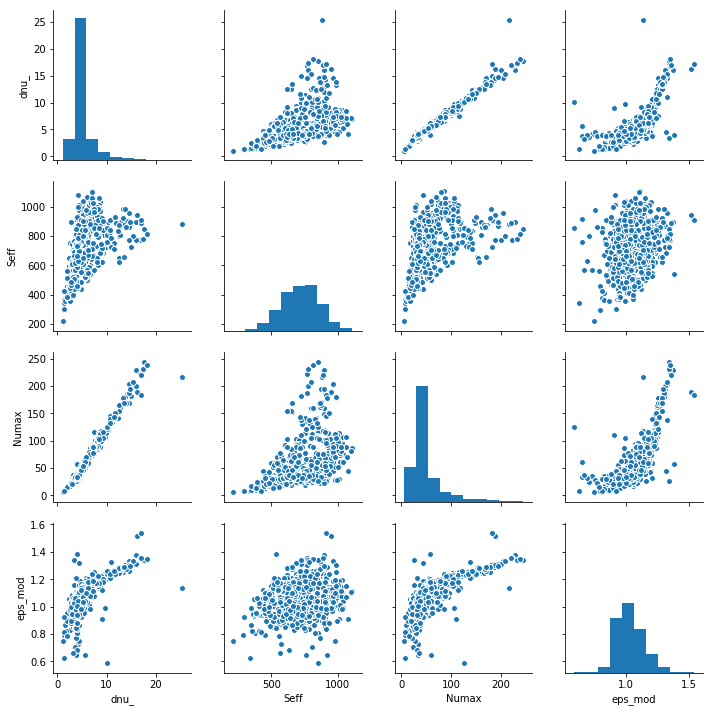

In [5]:
import seaborn as sns
sns.pairplot(df[['dnu_', 'Seff', 'Numax', 'eps_mod']])
plt.show()

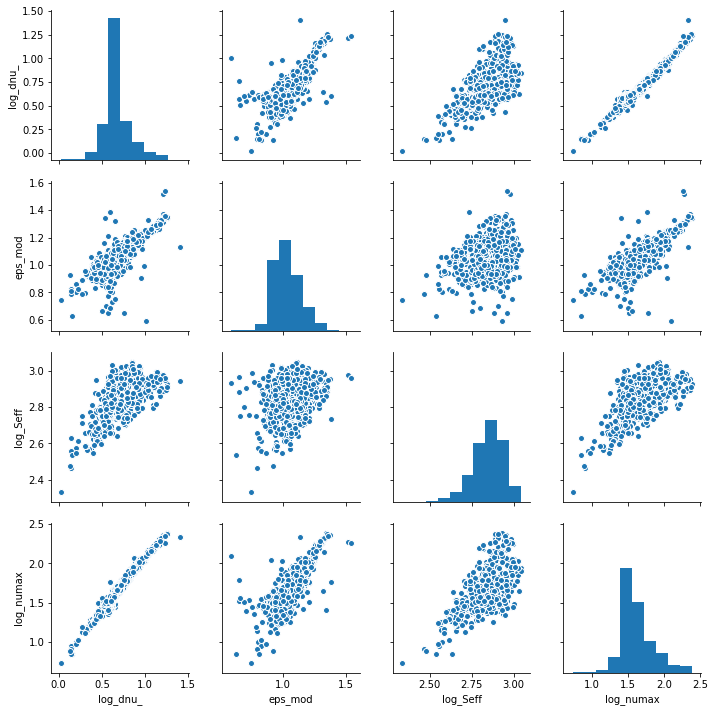

In [6]:
import seaborn as sns
sns.pairplot(df[['log_dnu_', 'eps_mod', 'log_Seff', 'log_numax']])
plt.show()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


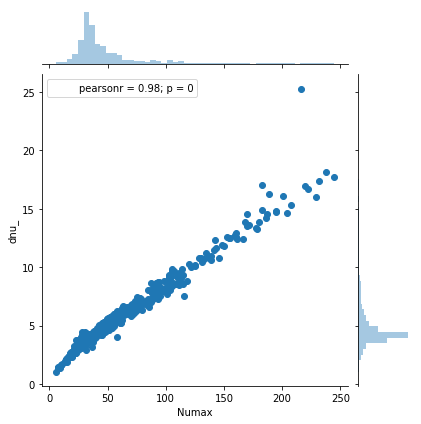

In [7]:
sns.jointplot(df['Numax'], df['dnu_'])

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


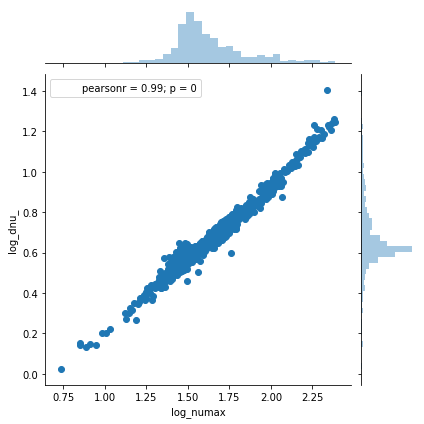

In [8]:
sns.jointplot(df['log_numax'], df['log_dnu_'])

# KDE method

Describe data with KDE
Make KDE into a function including observables. (multiply result of kde with observed probability).
Then marginalise till we have a 1-D posterior/prior in epsilon.




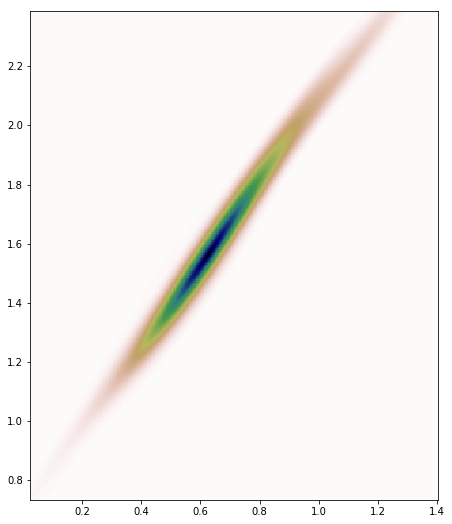

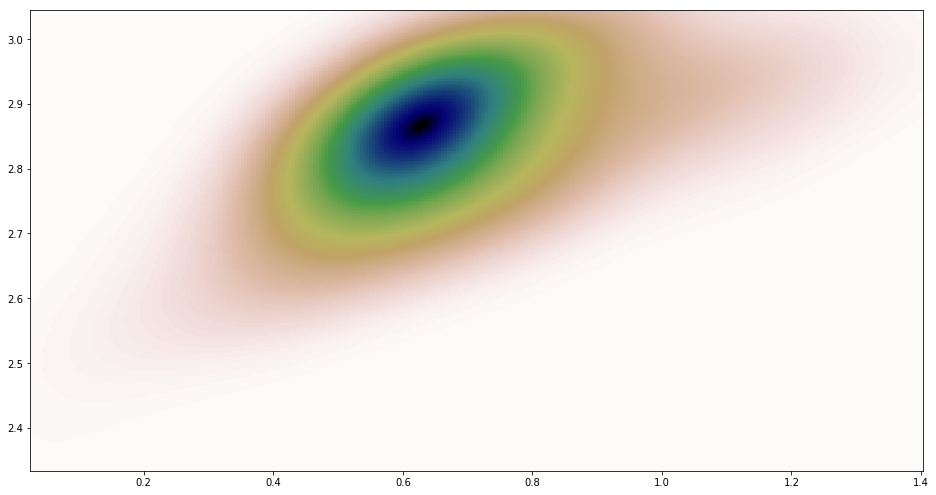

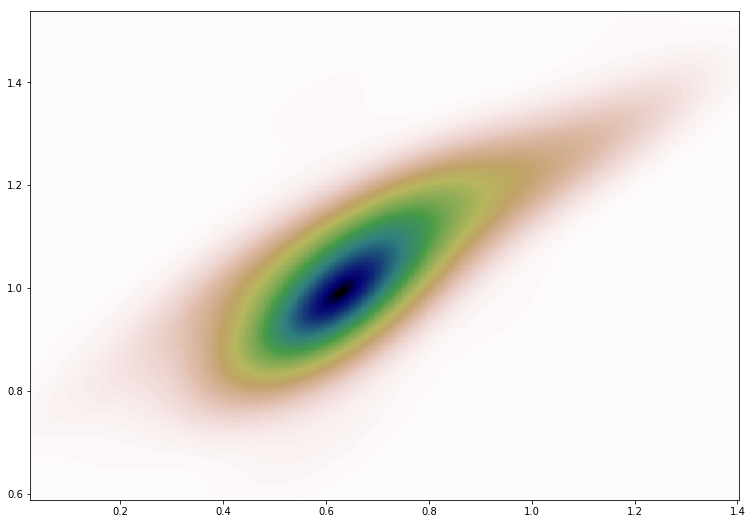

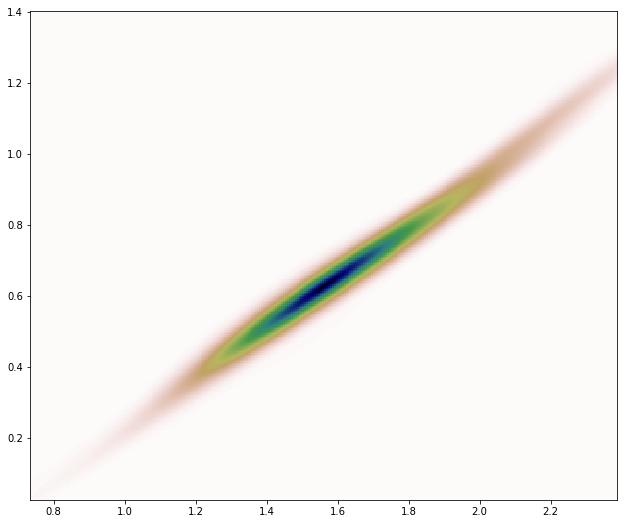

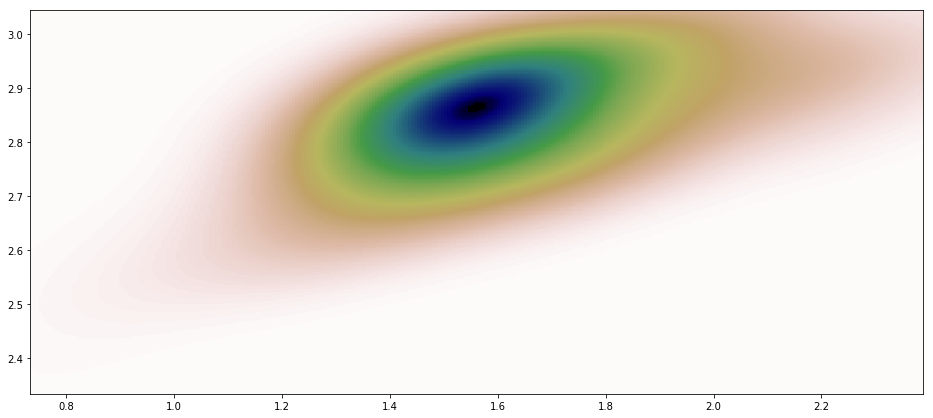

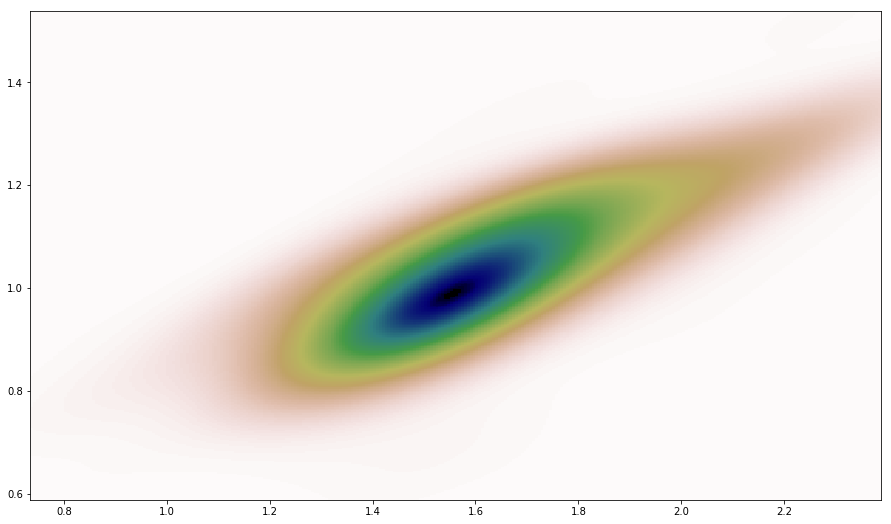

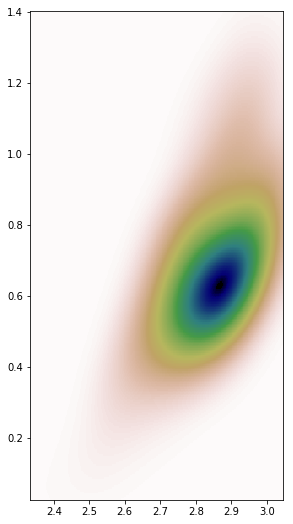

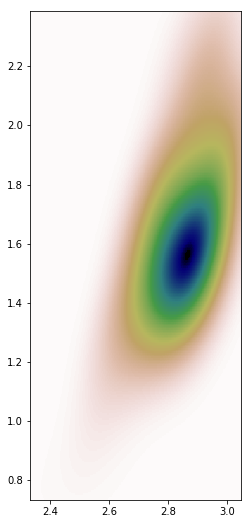

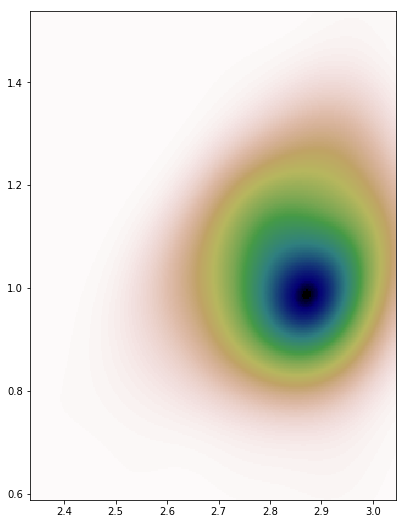

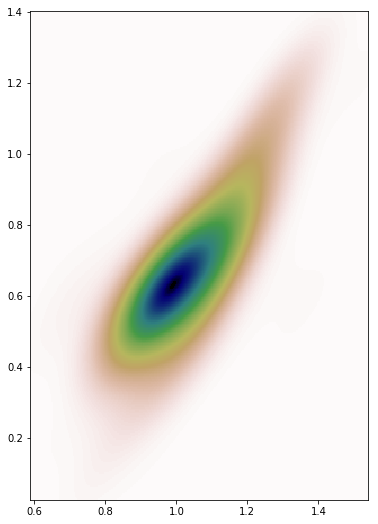

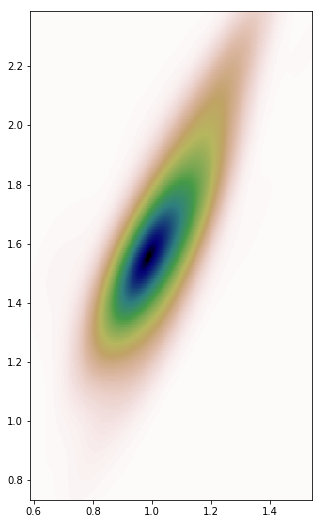

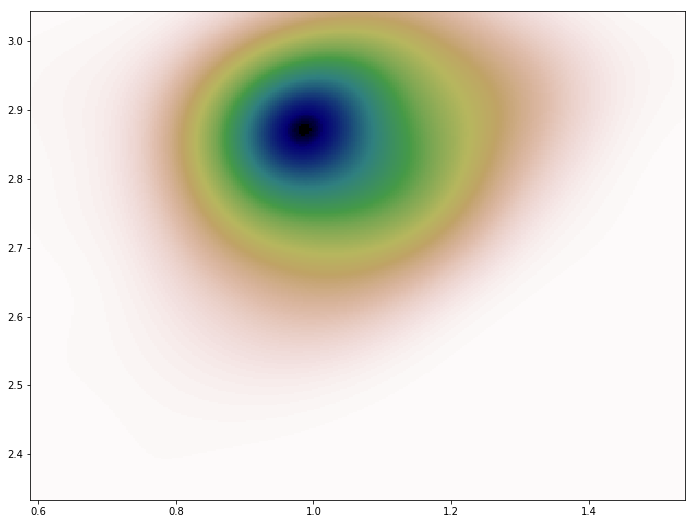

In [25]:
from scipy.stats import gaussian_kde
cols = ['log_dnu_', 'log_numax', 'log_Seff', 'eps_mod']
for coli in cols:
    for colj in cols:
        if coli != colj:
            df = epsilon.prior_data[[coli, colj]]
            kde = gaussian_kde(df.values.T, 0.7)
            xmin = np.min(df[coli])
            xmax = np.max(df[coli])
            ymin = np.min(df[colj])
            ymax = np.max(df[colj])

            X, Y = np.mgrid[xmin:xmax:300j, ymin:ymax:300j]
            positions = np.vstack([X.ravel(), Y.ravel()])
            Z = np.reshape(kde(positions).T, X.shape)
            fig, ax = plt.subplots(figsize=[16,9])
            ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
                      extent=[xmin, xmax, ymin, ymax])
            #ax.plot(df_comb.log_numax, df_comb.eps_corr, 'k.', markersize=2, alpha=0.2)
            ax.set_xlim([xmin, xmax])
            ax.set_ylim([ymin, ymax])

In [33]:
epsilon.make_kde(bw=0.8)

In [34]:
epsilon.obs = {'dnu': [10.0, 0.1], 'numax': [120.0, 1.0], 'teff': [4800.0, 70.0], 'seff': [800.0, 70.0]}
epsilon.obs_to_log(epsilon.obs)
print(epsilon.log_obs)

{'dnu': [1.0, 0.004342944819032518], 'numax': [2.0791812460476247, 0.003619120682527098], 'teff': [3.681241237375587, 0.006333461194422422], 'seff': [2.9030899869919438, 0.03800076716653453]}


In [35]:
epsilon.likelihood([np.log10(10), np.log10(120.0), np.log10(800), 0.9])

array([0.14672077])

In [36]:
res = epsilon.kde_sampler()

[1.0, 2.0791812460476247, 2.9030899869919438, 1.0]


In [37]:
print(res)

[[1.00025581 2.07962156 2.90349008 1.00071279]
 [1.00023936 2.07965419 2.90350955 1.00068971]
 [1.00023936 2.07965419 2.90350955 1.00068971]
 ...
 [1.00071528 2.07511638 2.89420053 1.24256256]
 [1.00148697 2.0743514  2.89914143 1.25757019]
 [1.00148697 2.0743514  2.89914143 1.25757019]]


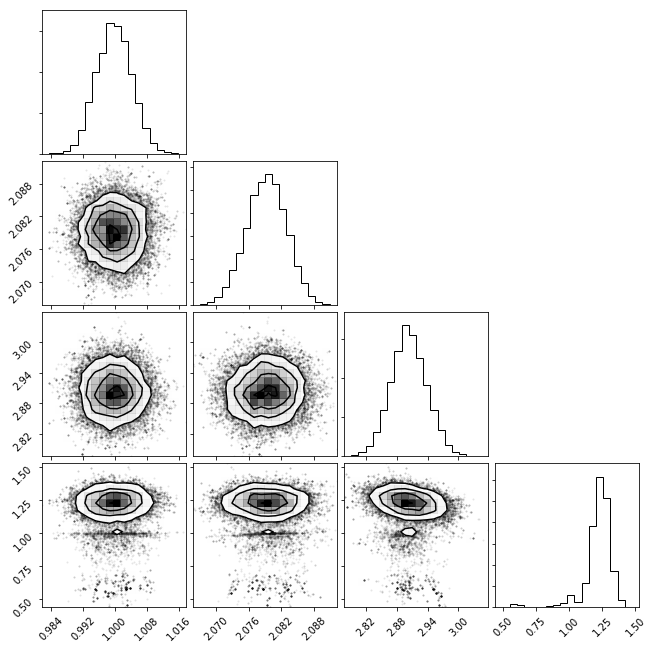

In [38]:
import corner
corner.corner(res)
plt.show()

In [39]:
print(res[:,3].mean(), res[:,3].std())

1.2114244529832665 0.12044838070270177
